In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '959e7797-b952-4393-8a67-814c8d0027dd',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-07-19T15:01:25.894Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9921}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9626, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9626,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.909771e+07,1.909771e+07,NaN,1,NaN,NaN,None,2022-07-19T15:00:00.000Z,22514.133068,4.862651e+10,31.6835,1.215744,1.496449,13.131062,15.742896,-23.773221,-45.850692,4.299683e+11,41.4748,4.727968e+11,None,2022-07-19T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
1,1027,Ethereum,ETH,ethereum,5827,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.216115e+08,1.216115e+08,NaN,2,NaN,NaN,None,2022-07-19T14:59:00.000Z,1547.091161,2.949258e+10,23.3257,-0.245210,4.338431,43.928280,49.340134,-22.251746,-50.140083,1.881441e+11,18.1600,1.881441e+11,None,2022-07-19T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
2,825,Tether,USDT,tether,36283,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.586628e+10,6.816698e+10,NaN,3,NaN,NaN,None,2022-07-19T14:59:00.000Z,0.999970,8.161614e+10,27.9976,0.005606,0.010986,0.068677,0.108532,0.082404,-0.029117,6.586427e+10,6.3533,6.816490e+10,None,2022-07-19T14:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-19 15:01:29.195671
3,3408,USD Coin,USDC,usd-coin,4894,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.471394e+10,5.471394e+10,NaN,4,NaN,NaN,None,2022-07-19T14:59:00.000Z,1.000109,9.383377e+09,38.3569,0.010801,-0.006198,-0.021320,-0.039324,0.003686,0.020781,5.471991e+10,5.2817,5.471991e+10,None,2022-07-19T14:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-19 15:01:29.195671
4,1839,BNB,BNB,bnb,1011,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-07-19T14:59:00.000Z,264.138725,1.756012e+09,24.3475,0.523577,1.357795,16.541347,27.422981,-13.215693,-37.739038,4.261542e+10,4.1107,5.282774e+10,None,2022-07-19T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
5,52,XRP,XRP,xrp,765,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,6,NaN,NaN,None,2022-07-19T15:00:00.000Z,0.364217,1.473005e+09,-4.5039,0.263321,0.169726,16.424651,15.724404,-12.356789,-52.089425,1.760740e+10,1.7178,3.642174e+10,None,2022-07-19T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
6,4687,Binance USD,BUSD,binance-usd,4079,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,7,NaN,NaN,None,2022-07-19T14:59:00.000Z,1.001776,8.648869e+09,36.8284,0.219926,0.237140,-0.061510,0.194233,0.048493,0.147014,1.757839e+10,1.6956,1.757839e+10,None,2022-07-19T14:59:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-19 15:01:29.195671
7,2010,Cardano,ADA,cardano,518,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375257e+10,3.451285e+10,NaN,8,NaN,NaN,None,2022-07-19T14:59:00.000Z,0.504223,1.385846e+09,6.7702,0.470141,3.064899,16.423855,9.148071,-2.308037,-47.481783,1.701881e+10,1.6427,2.269002e+10,None,2022-07-19T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
8,5426,Solana,SOL,solana,349,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.456084e+08,5.116169e+08,NaN,9,NaN,NaN,None,2

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '959e7797-b952-4393-8a67-814c8d0027dd',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df=df.append(df2)

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2022-07-19T15:01:30.907Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9921}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9626, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9626,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.909771e+07,1.909771e+07,NaN,1,NaN,NaN,None,2022-07-19T15:00:00.000Z,22514.133068,4.862651e+10,31.6835,1.215744,1.496449,13.131062,15.742896,-23.773221,-45.850692,4.299683e+11,41.4748,4.727968e+11,None,2022-07-19T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
1,1027,Ethereum,ETH,ethereum,5827,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.216115e+08,1.216115e+08,NaN,2,NaN,NaN,None,2022-07-19T14:59:00.000Z,1547.091161,2.949258e+10,23.3257,-0.245210,4.338431,43.928280,49.340134,-22.251746,-50.140083,1.881441e+11,18.1600,1.881441e+11,None,2022-07-19T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
2,825,Tether,USDT,tether,36283,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.586628e+10,6.816698e+10,NaN,3,NaN,NaN,None,2022-07-19T14:59:00.000Z,0.999970,8.161614e+10,27.9976,0.005606,0.010986,0.068677,0.108532,0.082404,-0.029117,6.586427e+10,6.3533,6.816490e+10,None,2022-07-19T14:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-19 15:01:29.195671
3,3408,USD Coin,USDC,usd-coin,4894,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.471394e+10,5.471394e+10,NaN,4,NaN,NaN,None,2022-07-19T14:59:00.000Z,1.000109,9.383377e+09,38.3569,0.010801,-0.006198,-0.021320,-0.039324,0.003686,0.020781,5.471991e+10,5.2817,5.471991e+10,None,2022-07-19T14:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-19 15:01:29.195671
4,1839,BNB,BNB,bnb,1011,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-07-19T14:59:00.000Z,264.138725,1.756012e+09,24.3475,0.523577,1.357795,16.541347,27.422981,-13.215693,-37.739038,4.261542e+10,4.1107,5.282774e+10,None,2022-07-19T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
5,52,XRP,XRP,xrp,765,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,6,NaN,NaN,None,2022-07-19T15:00:00.000Z,0.364217,1.473005e+09,-4.5039,0.263321,0.169726,16.424651,15.724404,-12.356789,-52.089425,1.760740e+10,1.7178,3.642174e+10,None,2022-07-19T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
6,4687,Binance USD,BUSD,binance-usd,4079,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,7,NaN,NaN,None,2022-07-19T14:59:00.000Z,1.001776,8.648869e+09,36.8284,0.219926,0.237140,-0.061510,0.194233,0.048493,0.147014,1.757839e+10,1.6956,1.757839e+10,None,2022-07-19T14:59:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-19 15:01:29.195671
7,2010,Cardano,ADA,cardano,518,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375257e+10,3.451285e+10,NaN,8,NaN,NaN,None,2022-07-19T14:59:00.000Z,0.504223,1.385846e+09,6.7702,0.470141,3.064899,16.423855,9.148071,-2.308037,-47.481783,1.701881e+10,1.6427,2.269002e+10,None,2022-07-19T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
8,5426,Solana,SOL,solana,349,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.456084e+08,5.116169e+08,NaN,9,NaN,NaN,None,2

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9626,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19097706.00000,19097706.00000,NaN,1,NaN,NaN,None,2022-07-19T15:00:00.000Z,22514.13307,48626510939.97860,31.68350,1.21574,1.49645,13.13106,15.74290,-23.77322,-45.85069,429968294170.82477,41.47480,472796794420.60999,None,2022-07-19T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
1,1027,Ethereum,ETH,ethereum,5827,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121611532.68650,121611532.68650,NaN,2,NaN,NaN,None,2022-07-19T14:59:00.000Z,1547.09116,29492582457.92259,23.32570,-0.24521,4.33843,43.92828,49.34013,-22.25175,-50.14008,188144127288.28149,18.16000,188144127288.28000,None,2022-07-19T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
2,825,Tether,USDT,tether,36283,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65866277710.38728,68166976393.57961,NaN,3,NaN,NaN,None,2022-07-19T14:59:00.000Z,0.99997,81616136974.89993,27.99760,0.00561,0.01099,0.06868,0.10853,0.08240,-0.02912,65864269116.48219,6.35330,68164897639.81000,None,2022-07-19T14:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-19 15:01:29.195671
3,3408,USD Coin,USDC,usd-coin,4894,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54713940405.88802,54713940405.88802,NaN,4,NaN,NaN,None,2022-07-19T14:59:00.000Z,1.00011,9383376723.82222,38.35690,0.01080,-0.00620,-0.02132,-0.03932,0.00369,0.02078,54719910029.68513,5.28170,54719910029.69000,None,2022-07-19T14:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-19 15:01:29.195671
4,1839,BNB,BNB,bnb,1011,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-19T14:59:00.000Z,264.13872,1756012021.79820,24.34750,0.52358,1.35779,16.54135,27.42298,-13.21569,-37.73904,42615418400.67512,4.11070,52827744952.11000,None,2022-07-19T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
5,52,XRP,XRP,xrp,765,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,6,NaN,NaN,None,2022-07-19T15:00:00.000Z,0.36422,1473004921.12006,-4.50390,0.26332,0.16973,16.42465,15.72440,-12.35679,-52.08942,17607399040.57050,1.71780,36421740857.75000,None,2022-07-19T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19 15:01:29.195671
6,4687,Binance USD,BUSD,binance-usd,4079,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,7,NaN,NaN,None,2022-07-19T14:59:00.000Z,1.00178,8648869109.39892,36.82840,0.21993,0.23714,-0.06151,0.19423,0.04849,0.14701,17578386266.81354,1.69560,17578386266.81000,None,2022-07-19T14:59:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-19 15:01:29.195671
7,2010,Cardano,ADA,cardano,518,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34512850428.99300,NaN,8,NaN,NaN,None,2022-07-19T14:59:00.000Z,0.50422,1385845573.75016,6.77020,0.47014,3.06490,16.42385,9.14807,-2.30804,-47.48178,17018806063.60158,1.64270,22690016928.92000,None,2022-07-19T14:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-19

In [10]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.21574,1.49645,13.13106,15.74290,-23.77322,-45.85069
Ethereum,-0.24521,4.33843,43.92828,49.34013,-22.25175,-50.14008
Tether,0.00561,0.01099,0.06868,0.10853,0.08240,-0.02912
USD Coin,0.01080,-0.00620,-0.02132,-0.03932,0.00369,0.02078
BNB,0.52358,1.35779,16.54135,27.42298,-13.21569,-37.73904
XRP,0.26332,0.16973,16.42465,15.72440,-12.35679,-52.08942
Binance USD,0.21993,0.23714,-0.06151,0.19423,0.04849,0.14701
Cardano,0.47014,3.06490,16.42385,9.14807,-2.30804,-47.48178
Solana,-0.27180,11.51821,36.80087,43.97662,-7.48747,-56.55555


In [11]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      1.21574
           quote.USD.percent_change_24h     1.49645
           quote.USD.percent_change_7d     13.13106
           quote.USD.percent_change_30d    15.74290
           quote.USD.percent_change_60d   -23.77322
                                             ...   
Shiba Inu  quote.USD.percent_change_24h     6.20976
           quote.USD.percent_change_7d     18.79097
           quote.USD.percent_change_30d    55.87235
           quote.USD.percent_change_60d     5.93981
           quote.USD.percent_change_90d   -51.08850
Length: 90, dtype: float64

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h    1.21574
          quote.USD.percent_change_24h   1.49645
          quote.USD.percent_change_7d   13.13106
          quote.USD.percent_change_30d  15.74290
          quote.USD.percent_change_60d -23.77322
...                                          ...
Shiba Inu quote.USD.percent_change_24h   6.20976
          quote.USD.percent_change_7d   18.79097
          quote.USD.percent_change_30d  55.87235
          quote.USD.percent_change_60d   5.93981
          quote.USD.percent_change_90d -51.08850

[90 rows x 1 columns]

In [14]:
df5.count()

values    90
dtype: int64

In [15]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.21574
1,Bitcoin,quote.USD.percent_change_24h,1.49645
2,Bitcoin,quote.USD.percent_change_7d,13.13106
3,Bitcoin,quote.USD.percent_change_30d,15.74290
4,Bitcoin,quote.USD.percent_change_60d,-23.77322
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,6.20976
86,Shiba Inu,quote.USD.percent_change_7d,18.79097
87,Shiba Inu,quote.USD.percent_change_30d,55.87235
88,Shiba Inu,quote.USD.percent_change_60d,5.93981


In [16]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.21574
1,Bitcoin,quote.USD.percent_change_24h,1.49645
2,Bitcoin,quote.USD.percent_change_7d,13.13106
3,Bitcoin,quote.USD.percent_change_30d,15.74290
4,Bitcoin,quote.USD.percent_change_60d,-23.77322
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,6.20976
86,Shiba Inu,quote.USD.percent_change_7d,18.79097
87,Shiba Inu,quote.USD.percent_change_30d,55.87235
88,Shiba Inu,quote.USD.percent_change_60d,5.93981


In [17]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.21574
1,Bitcoin,24h,1.49645
2,Bitcoin,7d,13.13106
3,Bitcoin,30d,15.74290
4,Bitcoin,60d,-23.77322
...,...,...,...
85,Shiba Inu,24h,6.20976
86,Shiba Inu,7d,18.79097
87,Shiba Inu,30d,55.87235
88,Shiba Inu,60d,5.93981


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

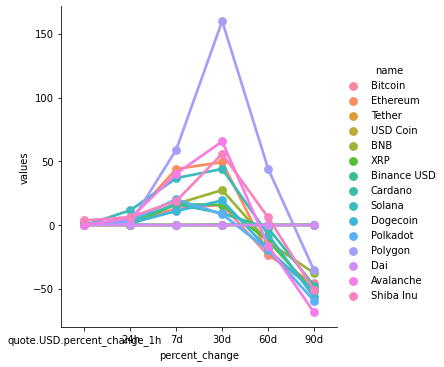

In [19]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [20]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,22514.13307,2022-07-19 15:01:29.195671
0,Bitcoin,22514.13307,2022-07-19 15:01:30.839261


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

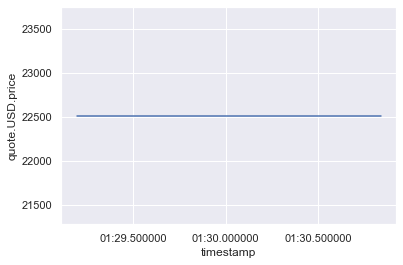

In [21]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)